CONVERTING MULTIPLE PDF TO JPEG


In [1]:
from pdf2image import convert_from_path
poppler_path=r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\poppler-22.01.0\Library\bin'
pdf_path= 'Old Form 5.pdf'
pages = convert_from_path(pdf_path=pdf_path,poppler_path= poppler_path)

In [2]:
import os
saving_folder= r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR'
c=1
for page in pages:
    img_name=f'img {c}.jpeg'
    page.save(os.path.join(saving_folder,img_name),'JPEG')
   

ACCESSING THAT SAVED JPEG FORM

In [3]:
import cv2
 
image1 = cv2.imread('img 1.jpeg')

image1_rs = cv2.resize(image1, (800, 800)) 


# to show 
#cv2.imshow('one',image1_rs)

# to save 
cv2.imwrite('img rsed.jpeg',image1_rs)

cv2.waitKey(0) 
  
cv2.destroyAllWindows()

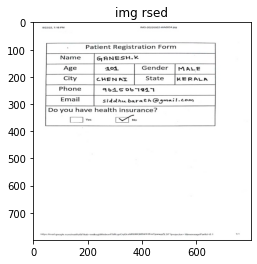

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img rsed.jpeg')

plt.title('img rsed')
plt.imshow(img)


CROPPING THE RESIZED IMAGE

In [5]:
import cv2
img = cv2.imread("img rsed.jpeg")
y=115
x=227
height=35
width=373
crop_name = img[y:y+height,x:x+width]  
crop_age = img[154:193,227:370]
crop_gender = img[154:190,520:662]
crop_city = img[194:230,227:370]
crop_state = img[193:230,520:662]
crop_phone = img[231:270,227:663]
crop_email = img[271:308,227:663]
crop_checkbox = img[345:362,138:178]
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\name.jpeg', crop_name)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\age.jpeg', crop_age)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\gender.jpeg', crop_gender)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\city.jpeg', crop_city)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\state.jpeg', crop_state)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\phone.jpeg', crop_phone)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\email.jpeg', crop_email)
cv2.imwrite(r'C:\Users\suriy\OneDrive\Desktop\Hackathon HTR\Extracted fields\checkbox.jpeg', crop_checkbox)


True

Handwritten text extraction

In [6]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import matplotlib.pyplot as plt
import keras_ocr
%matplotlib inline

In [7]:

url = [
     r'Extracted fields\name.jpeg',
    r'Extracted fields\gender.jpeg',
    r'Extracted fields\city.jpeg',
    r'Extracted fields\state.jpeg',
    r'Extracted fields\email.jpeg',
]

images = [ keras_ocr.tools.read(i) for i in url]
fig = plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

In [8]:
texts = []
for img in images:
    texts.append(pytesseract.image_to_string(img))
print(texts)

['GANESH.K\n', 'MALE\n', 'CHENAL\n', 'KERALA\n', 'Siddhu barath @ gmail.com\n']


Digit extraction

In [9]:
import easyocr
import numpy as np
import pandas as pd

In [10]:
image_age=cv2.imread(r'Extracted fields\age.jpeg')
image_phone=cv2.imread(r'Extracted fields\phone.jpeg')

In [ ]:
digits=[]

lang = easyocr.Reader(['en'],gpu=False)
result1 = lang.readtext(image_age)


digits.append(result1[0][1])




Using CPU. Note: This module is much faster with a GPU.
C:\Users\suriy\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\suriy\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\suriy\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
result2 = lang.readtext(image_phone)

digits.append(result2[0][1])

digits

In [ ]:
texts

Check box extraction

In [ ]:
import numpy as np
import cv2

fixed= cv2.imread('fixed checkbox.jpeg')
input1= cv2.imread(r'Extracted fields\checkbox.jpeg')
diff = cv2.subtract(fixed,input1)
b, g, r = cv2.split(diff)
print(cv2.countNonZero(b))
if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    texts.append("Yes")
else:
    texts.append("No")
print(texts)


In [ ]:
final=texts+digits
final

In [ ]:
fields = ["Name:"+final[0],"Gender:"+final[1],"Age:"+final[6],"Phone:"+final[7],"City:"+final[2],"State:"+final[3],"Email:"+final[4],"Insurance:"+final[5]]

In [ ]:
for i in range(len(fields)):
    s=fields[i]
    if(s[-1]=='\n'):
        print(s[:len(s)-1],sep="\t")
        continue
    print(fields[i])
#print(''.join(i for i in fields))    

Tamil Data extraction

In [ ]:
from googletrans import Translator
translater=Translator()
for i in range(len(fields)):
 a=translater.translate(fields[i],dest="ta")
 print(a.text)

In [ ]:
tamil_name= 'பெயர்: கணேஷ்.கே'
tamil_gender='பாலினம்: ஆண்'



In [ ]:
from googletrans import Translator
translater=Translator()

tamil2eng_name=translater.translate(tamil_name,dest="en")
print(tamil2eng_name.text)

In [ ]:

translater=Translator()

tamil2eng_gender=translater.translate(tamil_gender,dest="en")
print(tamil2eng_gender.text)

In [ ]:
from googletrans import Translator
translater=Translator()
tamil=['கணேஷ்.கே','ஆண்']
for i in tamil:
    eng=translater.translate(i,dest="en")
    print(eng.text)